### 1. Define ChainState

In [1]:
import random
from typing import TypedDict
from langgraph.graph import StateGraph, END

class ChainState(TypedDict):
    n: int
    number: int
    used_numbers: set[int]

### 2. Add, dump, and stop-condition functions

In [2]:
def add(state: ChainState) -> ChainState:
  used_numbers = state.get("used_numbers", set())
  
  if len(used_numbers) >= 49:
        raise ValueError("All numbers from 1-49 have been used")
      
  available = set(range(1, 50)) - used_numbers          
  random_number = random.choice(list(available))
          
  new_used_numbers = used_numbers.copy()
  new_used_numbers.add(random_number)
    
  return {
        **state, 
        "n": state["n"] + 1, 
        "number": random_number,
        "used_numbers": new_used_numbers
    }

def dump(state: ChainState) -> ChainState:
    print("Current n:", state["n"], "number:", state["number"])
    print("Winning numbers:", sorted(state.get("used_numbers", set())))
    return state
    
def stop_condition(state: ChainState) -> bool:
    return state["n"] >= 6

### 3. Build the graph

In [3]:
graph = StateGraph(ChainState)
graph.add_node("add", add)
graph.add_node("dump", dump)
graph.add_edge("add", "dump")

graph.add_conditional_edges("dump", stop_condition, {
    True: END,
    False: "add",
})

graph.set_entry_point("add")
app = graph.compile()

### 4. Run the graph

In [4]:
result = app.invoke({"n": 0, "number": ""})

Current n: 1 number: 30
Winning numbers: [30]
Current n: 2 number: 36
Winning numbers: [30, 36]
Current n: 3 number: 1
Winning numbers: [1, 30, 36]
Current n: 4 number: 31
Winning numbers: [1, 30, 31, 36]
Current n: 5 number: 5
Winning numbers: [1, 5, 30, 31, 36]
Current n: 6 number: 6
Winning numbers: [1, 5, 6, 30, 31, 36]


### 5. Visualize the chain

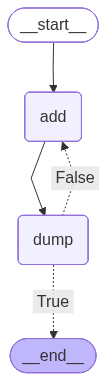

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))